In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.naive_bayes import GaussianNB
from  matplotlib.colors import ListedColormap


In [2]:
from numpy.random import default_rng
rng=default_rng()
rng.standard_normal(10)

features=['clouds','temp','humd','wind']
sample=100
clouds=3+rng.standard_normal(sample)*2
temp=25+rng.standard_normal(sample)*30
humd=20+rng.standard_normal(sample)*40
wind=10+rng.standard_normal(sample)*50
X=np.array([clouds,temp,humd,wind]).T
y=np.ones(X.shape[0])

y[X[:,0]>3]=0
y[X[:,1]>30]=0
y[X[:,3]<10]=0
df=pd.DataFrame(list(zip(clouds,temp,humd,wind,y)),columns=['clouds','temp','humd','wind','y'])

In [63]:
df.head()

,clouds,temp,humd,wind,y
0,2.350771,28.130234,22.928769,9.037382,0.0
1,1.359968,24.878791,22.537931,3.452434,0.0
2,3.332422,25.385575,19.554122,11.416414,0.0
3,2.164848,26.479304,22.004944,11.407157,1.0
4,4.215023,22.289265,18.606637,4.691903,0.0


In [4]:
x=df[['temp','humd']]
y=df['y']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=100)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
# fitting the data model building  
from sklearn.naive_bayes import GaussianNB
gnm=GaussianNB()
gnm.fit(x_train,y_train)
y_pred=gnm.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score
print('f1_score',f1_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred))

print('precision_score',precision_score(y_test,y_pred))

print('accuracy_score',accuracy_score(y_test,y_pred))



[[27  0]
 [ 3  0]]
f1_score 0.0
recall 0.0
precision_score 0.0
accuracy_score 0.9


C:\Users\munna.pandey\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


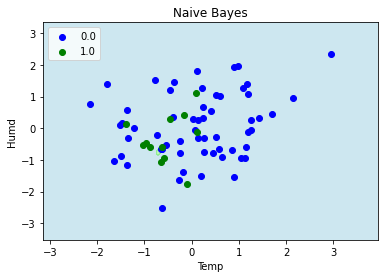

In [5]:
x_set,y_set=x_train,y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)) 
plt.contourf(X1, X2,gnm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=.6,cmap = ListedColormap(('lightblue', 'lightgreen'))) 
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('b','g'))(i),label=j)
    
plt.title('Naive Bayes')
plt.xlabel('Temp')
plt.ylabel('Humd')
plt.legend()
    

In [80]:
a=np.array([1,2,3])
b=np.array([5,6,7])
x,y=np.meshgrid(a,b)
x.ravel()

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [6]:
for i,j in enumerate(np.unique(y_set)):
    print(i,j)

0 0.0
1 1.0


In [8]:
from sklearn.tree import DecisionTreeClassifier
d_df=pd.read_csv(r"C:\Users\munna.pandey\Downloads\DS2_C5_S4_Diabetes_Data_Concept (1).csv")


In [11]:
d_df.columns=['preg','glucose','bp','skin','ins','bmi','predfun','age','label']
d_df.head()

,preg,glucose,bp,skin,ins,bmi,predfun,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
d_df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
ins,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
predfun,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
label,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [13]:
d_df.shape

(768, 9)

In [14]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   preg     768 non-null    int64  
 1   glucose  768 non-null    int64  
 2   bp       768 non-null    int64  
 3   skin     768 non-null    int64  
 4   ins      768 non-null    int64  
 5   bmi      768 non-null    float64
 6   predfun  768 non-null    float64
 7   age      768 non-null    int64  
 8   label    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
x=d_df.drop(columns='label')
y=d_df['label']


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3)
model=dt.fit(x_train,y_train)
p_pred=model.predict(x_test)
print('accuracy_score',accuracy_score(p_pred,y_test))
print('f1_score',f1_score(p_pred,y_test))



accuracy_score 0.7207792207792207
f1_score 0.5904761904761905


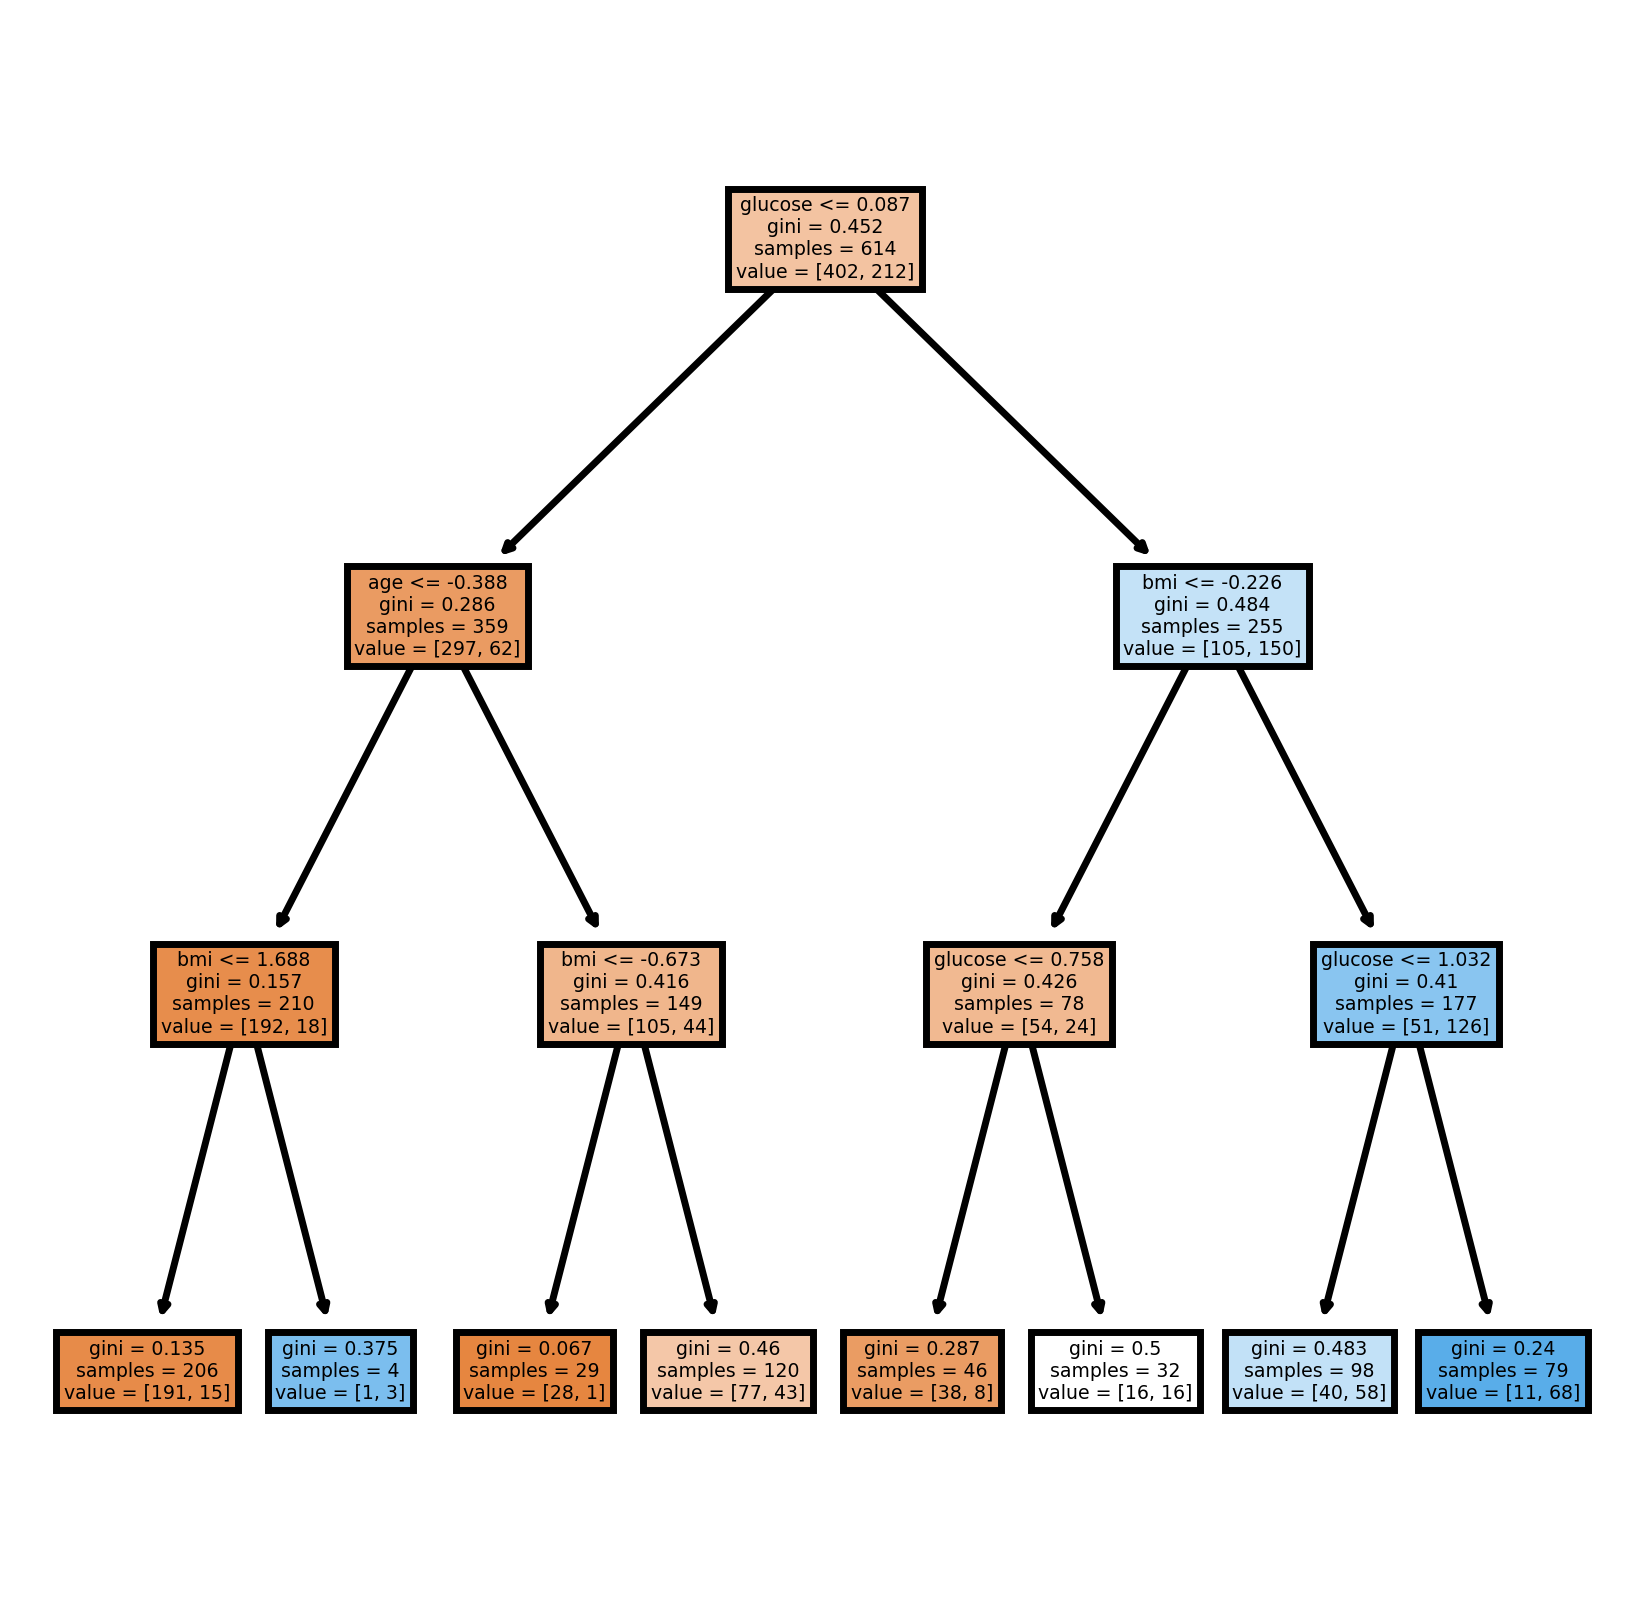

In [43]:
from sklearn import tree
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model, feature_names = d_df.columns, filled = True)
#fig.savefig('Diabetes_Tree.png')
plt.show()